## **PREDIKSI PEMBELI ASURANSI MOBIL**

  **NAMA : INDAH GALA PUTRI<br>NIM  : 09011182126033<br>KELAS : SK 6 A**


  pada projek ini saya memilih topik supervised learning diamana saya akan mealakukan prediksi dari pelanggan yang dihubungi untuk mengikuti kampanye yang diselenggarakan oleh bank di Amerika Selatan, apakah mereka akan membeli asuransi mobil atau tidak. adapun pada projek ini saya menggunakan dataset Car Insurance Cold Calls. dataset ini merupakan data dari salah satu bank di Amerika Serikat. dimana dataset ini berisi tentang informasi klien seperti usia, pekerjaan, dll. serta informasi yang lebih spesifik tentang kampanye penjualan asuransi saat ini seperti communication, last contact day dan kampanye sebelumnya seperti previous attempts, outcome. kemudian model yang saya gunakan untuk melakukan prediksi adalah Logistic Regression.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/indahPML/car_train.csv')
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


### **1. ANALISIS EKSPLORASI** **DATASET**

In [ ]:
print("Dataset Shape (row, col): {}".format(df.shape))

Dataset Shape (row, col): (4000, 19)


Disana terlihat bahwa pada dataset yang saya gunakan terdapat 4000 baris dan 19 kolom pada dataset

In [ ]:
df.drop("Id", axis=1, inplace=True)

kolom “Id” dihapus karena tidak relevan untuk analisis atau pemodelan yang akan dibuat.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               4000 non-null   int64 
 1   Job               3981 non-null   object
 2   Marital           4000 non-null   object
 3   Education         3831 non-null   object
 4   Default           4000 non-null   int64 
 5   Balance           4000 non-null   int64 
 6   HHInsurance       4000 non-null   int64 
 7   CarLoan           4000 non-null   int64 
 8   Communication     3098 non-null   object
 9   LastContactDay    4000 non-null   int64 
 10  LastContactMonth  4000 non-null   object
 11  NoOfContacts      4000 non-null   int64 
 12  DaysPassed        4000 non-null   int64 
 13  PrevAttempts      4000 non-null   int64 
 14  Outcome           958 non-null    object
 15  CallStart         4000 non-null   object
 16  CallEnd           4000 non-null   object
 17  CarInsurance  

Terdapat beberapa kolom dengan tipe data yang berbeda:
* int64 untuk data numerik : Tipe data untuk kolom-kolom seperti 'Age', 'Default', 'Balance', dll.
* object untuk tipe data categorical : Tipe data untuk kolom-kolom seperti 'Job', 'Marital', 'Education', dll.

Beberapa kolom memiliki nilai yang hilang, contohnya, kolom 'Job' memiliki 3981 nilai non-null, dan kolom 'Outcome' hanya memiliki 958 nilai non-null. Hal ini menunjukkan keberadaan nilai yang hilang dalam data.

Adapun berikut ini penjelsan dari kolom-kolom yang ada :
* 'Age': Umur calon pelanggan asuransi.
* 'Job': Pekerjaan calon pelanggan.
* 'Marital': Status pernikahan calon pelanggan.
*  'Education': Tingkat pendidikan calon pelanggan.
* 'Default' : berisi informasi tentang apakah klien memiliki kredit dalam kondisi default atau tidak.(binary)
* 'Balance' : rata-rata saldo tahunan dalam mata uang Amerika Serikat (USD)  
* 'HHInsurance': Status asuransi rumah tangga (binary).
* 'CarLoan': apakah klien tersebut memiliki pinjaman mobil atau tidak
* 'Communication' : jenis komunikasi yang digunakan.  
* 'LastContactDay' : Tanggal  terakhir kontak dilakukan dengan klien
* 'LastContactMonth : bulan terkahir kontak dengan klien
* 'NoOfContacts : seberapa sering kontak dengan klien dilakukan
* 'DaysPassed : jumlah hari yang telah berlalu sejak kontak terakhir.
* 'PrevAttempts : jumlah upaya kontak sebelumnya yang telah dilakukan sebelum kampanye ini dimulai.  
* 'CarInsurance': Status asuransi mobil (target yang ingin diprediksi, binary).
* 'CallStart' dan 'CallEnd' mungkin berisi informasi tentang waktu panggilan.
* 'Outcome' berisi keputusan pelanggan terkait penawaran asuransi.


In [ ]:
df.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


disini kita dapat melihat ringkasan statistik deskriptif dari data seperti :
* Count: Jumlah entri atau pengamatan non-null dalam kolom.
* Mean: Rata-rata nilai dalam kolom.
* Std (Standard Deviation): Deviasi standar, mengukur seberapa tersebar nilai-nilai di sekitar rata-rata.
* Min: Nilai minimum dalam kolom.
* 25% (Q1): Kuartil pertama, nilai yang membagi 25% data terendah.
* 50% (Median): Nilai tengah atau median, membagi data menjadi dua bagian setara.
* 75% (Q3): Kuartil ketiga, nilai yang membagi 75% data terendah.
* Max: Nilai maksimum dalam kolom.

In [ ]:
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()
for col in cat[:6]:
    print(col,"\n",df[col].value_counts()/df.shape[0],"\n\n")

Job 
 Job
management       0.22325
blue-collar      0.18975
technician       0.16500
admin.           0.11475
services         0.08250
retired          0.06225
self-employed    0.03500
student          0.03275
unemployed       0.03250
entrepreneur     0.03025
housemaid        0.02725
Name: count, dtype: float64 


Marital 
 Marital
married     0.57600
single      0.30325
divorced    0.12075
Name: count, dtype: float64 


Education 
 Education
secondary    0.49700
tertiary     0.32050
primary      0.14025
Name: count, dtype: float64 


Communication 
 Communication
cellular     0.70775
telephone    0.06675
Name: count, dtype: float64 


LastContactMonth 
 LastContactMonth
may    0.26225
jul    0.14325
aug    0.13400
jun    0.11350
nov    0.08675
apr    0.07650
feb    0.06550
jan    0.03350
oct    0.02950
sep    0.02525
mar    0.01975
dec    0.01025
Name: count, dtype: float64 


Outcome 
 Outcome
failure    0.10925
success    0.08150
other      0.04875
Name: count, dtype: float64 




* Pada hasil diatas terlihat bahwa kebanyakan costumer bekerja di bidang management, mereka telah menikah, memiliki pendidikan tingkat secondary, dan menggunakan telepon cellular untuk berkomunikasi.
* untuk hasil kampanye pemasaran sebelumnya kebanyakan gagal.
* costumer paling banyak dihubungi pada bulan may

#### **Visualisasi data categorical**

CarInsurance
0    2396
1    1604
Name: count, dtype: int64


<ipython-input-9-de743048d069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CarInsurance" , data=df ,palette='rocket_r')


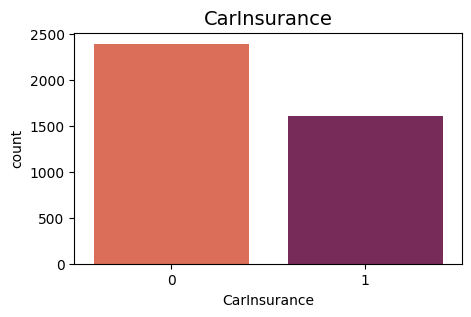

In [ ]:
print(df["CarInsurance"].value_counts())
total = float(len(df["CarInsurance"]))
plt.figure(figsize=(5,3))
sns.countplot(x="CarInsurance" , data=df ,palette='rocket_r')
plt.title("CarInsurance", fontsize=14)
plt.show()

terlihat bahwah klien paling banyak belum memiliki asuransi mobil. diamana yang memiliki asuransi mobil adalah sebanyak 1604 dan yang tidak punya asuransi mobil sebanyak 2396 orang

<ipython-input-10-a8740eb0b30a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome" , data=df ,palette='rocket_r')


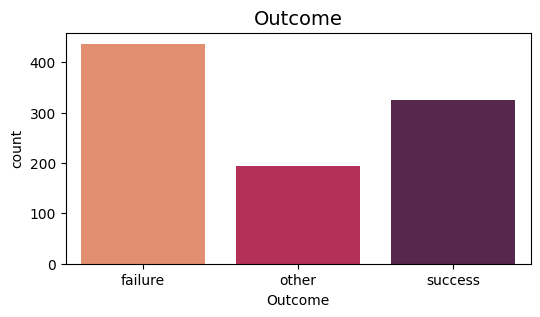

% of total:
Outcome
failure    10.92
success     8.15
other       4.88
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x="Outcome" , data=df ,palette='rocket_r')
plt.title("Outcome", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Outcome"].value_counts()/df.shape[0]),4)*100)



pada plot diatas dapat diketahu bahwa kebanyakan penawaran yang dilakukan kepada klien berakhir gagal(failure). adapun paling sedikt adalah other, berarti klien yang dihubungi pada penawaran sebelumnya kebanyakan belum menjawab secara signifikan

<ipython-input-11-08313a5be3c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Job" , data=df ,palette='viridis_r')


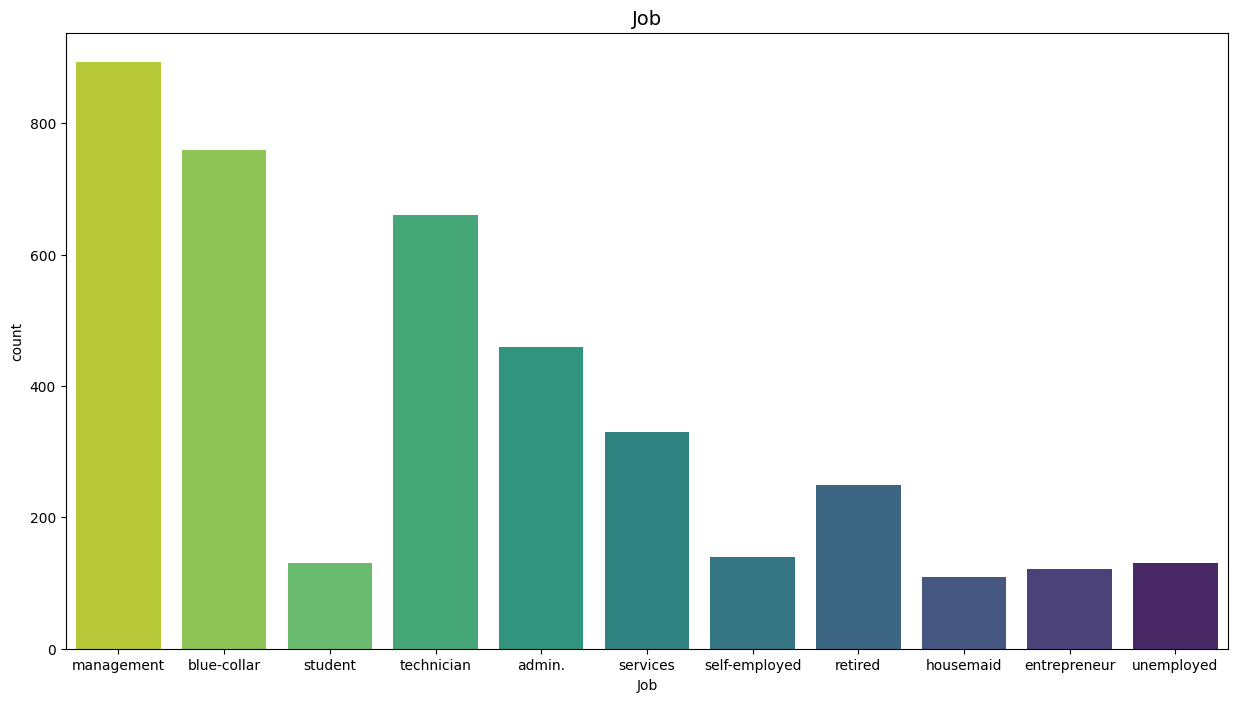

% of total:
Job
management       22.32
blue-collar      18.98
technician       16.50
admin.           11.48
services          8.25
retired           6.22
self-employed     3.50
student           3.28
unemployed        3.25
entrepreneur      3.02
housemaid         2.72
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="Job" , data=df ,palette='viridis_r')
plt.title("Job", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Job"].value_counts()/df.shape[0]),4)*100)

dari plot diatas dapat diketahui bahwa klien paling banyak bekerja sebagai management dan paling sedikit bekerja sebagai haousemaid.

<ipython-input-12-6c1a505fc9a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Marital" , data=df ,palette='rocket')


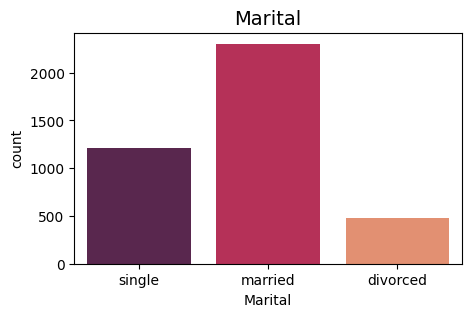

% of total:
Marital
married     57.60
single      30.32
divorced    12.08
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x="Marital" , data=df ,palette='rocket')
plt.title("Marital", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Marital"].value_counts()/df.shape[0]),4)*100)

pada plot tesebut, paling banyak klien telah berstatus menikah dan paling sedikit berstatus bercerai.

<ipython-input-13-3995762ff3ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education" , data=df ,palette='nipy_spectral')


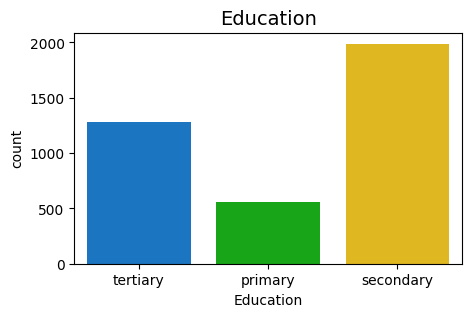

% of total:
Education
secondary    49.70
tertiary     32.05
primary      14.03
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x="Education" , data=df ,palette='nipy_spectral')
plt.title("Education", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Education"].value_counts()/df.shape[0]),4)*100)

berdasarkan plot tersebut dapat diketahui klien yang dihubungi paling banyak mempunyai pendidikan secondary (menengah) dan paling sedikit pendidikan primary (dasar)

<ipython-input-14-dc127e35b288>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Default" , data=df ,palette='CMRmap')


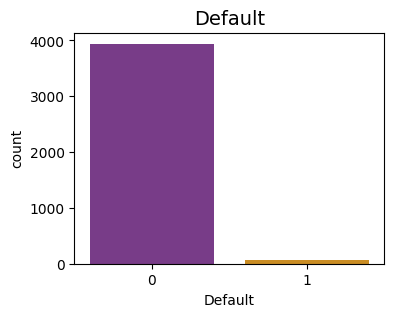

% of total:
Default
0    98.55
1     1.45
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x="Default" , data=df ,palette='CMRmap')
plt.title("Default", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Default"].value_counts()/df.shape[0]),4)*100)

dari plot diatas terlihat bahwa klien yang dihubungi 98,55% tidak mempuunyai kredit atau hutang.

<ipython-input-15-3d06650106aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HHInsurance" , data=df ,palette='rainbow')


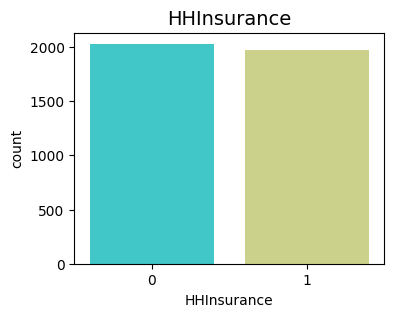

% of total:
HHInsurance
0    50.72
1    49.28
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x="HHInsurance" , data=df ,palette='rainbow')
plt.title("HHInsurance", fontsize=14)
plt.show()
print("% of total:")
print(round((df["HHInsurance"].value_counts()/df.shape[0]),4)*100)

terlihat bahwa klien yang dihubungi kebanyakan tidak mempunyai asuransi rumah.

<ipython-input-16-077a4b64452e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CarLoan" , data=df ,palette='rocket')


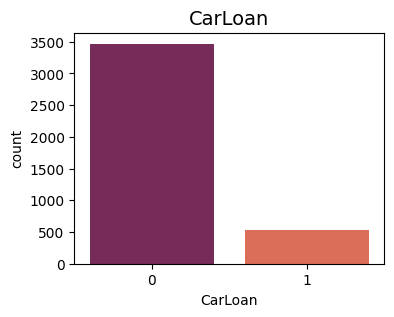

% of total:
CarLoan
0    86.7
1    13.3
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x="CarLoan" , data=df ,palette='rocket')
plt.title("CarLoan", fontsize=14)
plt.show()
print("% of total:")
print(round((df["CarLoan"].value_counts()/df.shape[0]),4)*100)

dari plot diatas dapat diketahui kebanyakan klien yang yang dihubungi tidak memiliki kredit mobil.

<ipython-input-17-87fe7ac85459>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Communication" , data=df ,palette='cubehelix')


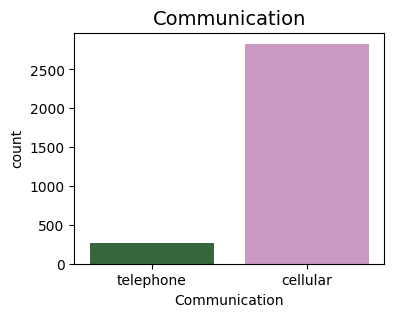

% of total:
Communication
cellular     70.78
telephone     6.68
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x="Communication" , data=df ,palette='cubehelix')
plt.title("Communication", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Communication"].value_counts()/df.shape[0]),4)*100)

dari plot diatas dapat diketahui bahwa jenis media komunikasi yang digunakan olrh klien adalah cellular

<ipython-input-18-3161412ddd26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="LastContactDay" , data=df ,palette='icefire')


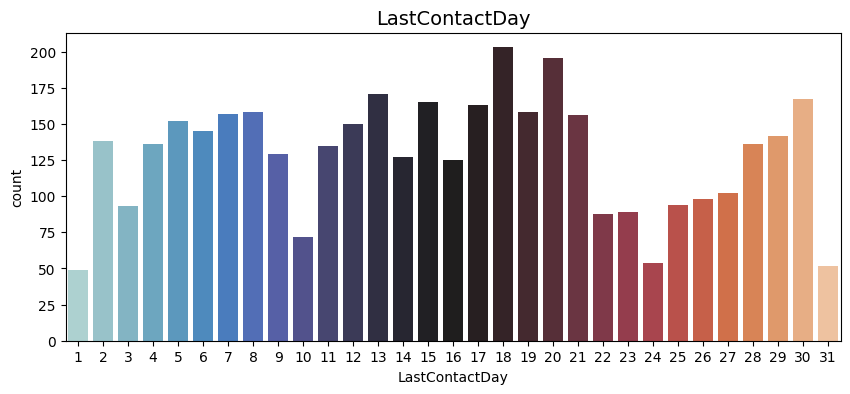

% of total:
LastContactDay
18    5.08
20    4.90
13    4.28
30    4.18
15    4.12
17    4.08
19    3.95
8     3.95
7     3.92
21    3.90
5     3.80
12    3.75
6     3.62
29    3.55
2     3.45
4     3.40
28    3.40
11    3.38
9     3.22
14    3.18
16    3.12
27    2.55
26    2.45
25    2.35
3     2.32
23    2.22
22    2.20
10    1.80
24    1.35
31    1.30
1     1.22
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="LastContactDay" , data=df ,palette='icefire')
plt.title("LastContactDay", fontsize=14)
plt.show()
print("% of total:")
print(round((df["LastContactDay"].value_counts()/df.shape[0]),4)*100)

terlihat bahwa klien paling sering dikontak pada tanggal 18 yaitu sebanyak 5,08% dan paling sedikit pada tanggal 1.

<ipython-input-19-af880e47f4a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="LastContactMonth" , data=df ,palette='icefire')


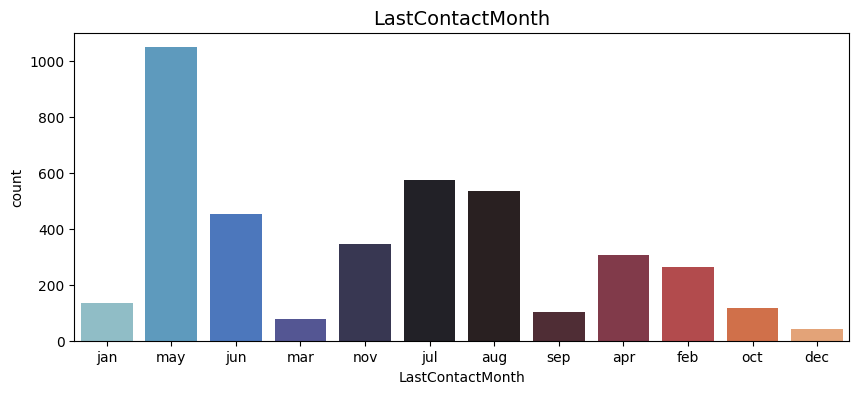

% of total:
LastContactMonth
may    26.22
jul    14.32
aug    13.40
jun    11.35
nov     8.67
apr     7.65
feb     6.55
jan     3.35
oct     2.95
sep     2.53
mar     1.98
dec     1.02
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="LastContactMonth" , data=df ,palette='icefire')
plt.title("LastContactMonth", fontsize=14)
plt.show()
print("% of total:")
print(round((df["LastContactMonth"].value_counts()/df.shape[0]),4)*100)

terlihat bahwa klien paling banyak dihubungi pada bulan may dan paling sedikit pada bulan desember

#### **Visualisasi data numeric**

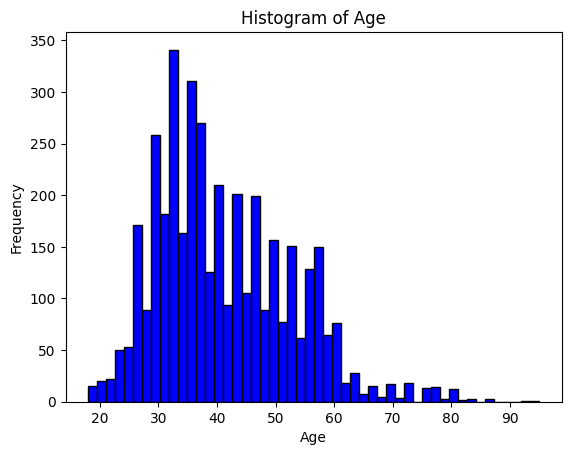

In [ ]:
plt.hist(df['Age'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

pada histogram tersebut terlihat bahwa umur klien rata-rata paling banyak berada pada usia 30an dengan frekuensi 340

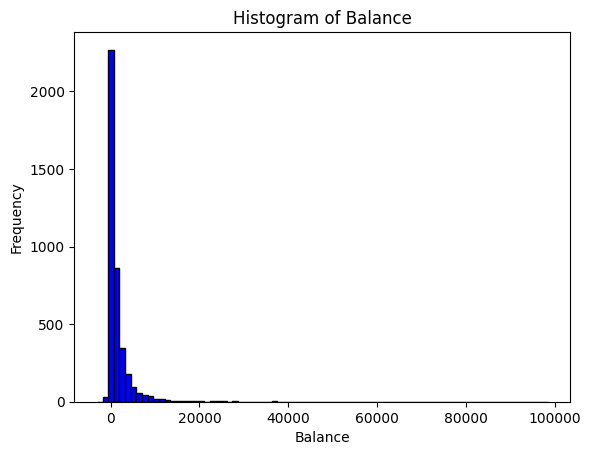

In [ ]:
plt.hist(df['Balance'], bins=80, color='blue', edgecolor='black')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')
plt.show()

disini terlihat bahwa balance (saldo) klient kebanyakan <20000 USD dan kemungkinan disini terdapat outlier

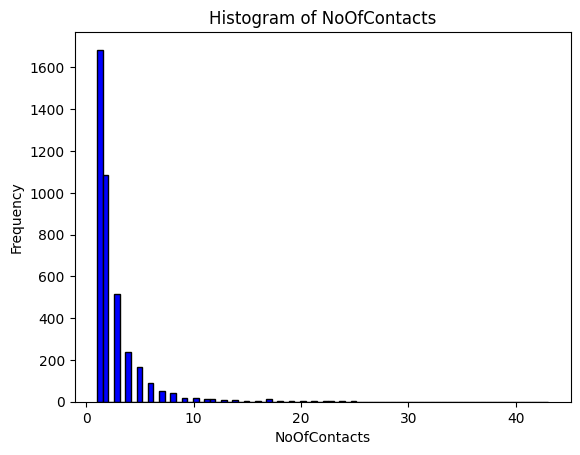

In [ ]:
plt.hist(df['NoOfContacts'], bins=80, color='blue', edgecolor='black')
plt.xlabel('NoOfContacts')
plt.ylabel('Frequency')
plt.title('Histogram of NoOfContacts')
plt.show()

disini terlihat bahwa kontak dengan klien paling sering dilakukan sebanyak 1 kali dengan frekuensi sebesar >1600

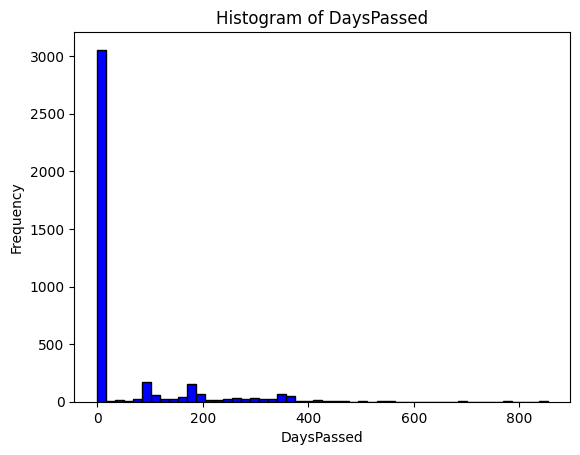

In [ ]:
plt.hist(df['DaysPassed'], bins=50, color='blue', edgecolor='black')
plt.xlabel('DaysPassed')
plt.ylabel('Frequency')
plt.title('Histogram of DaysPassed')
plt.show()

disini terlihat bahwa hari yang berlalu sejak panggilan terakhir paling banyak selama <100 hari.

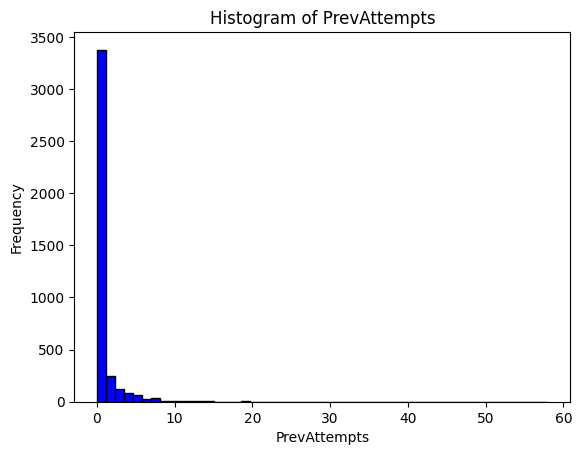

In [ ]:
plt.hist(df['PrevAttempts'], bins=50, color='blue', edgecolor='black')
plt.xlabel('PrevAttempts')
plt.ylabel('Frequency')
plt.title('Histogram of PrevAttempts')
plt.show()

disini terlihat jumlah upaya kontak yang dilakukan paling banyak dilakukan sekitar 1 kali dengan frekuensi >3000.

### **2. DATA PREPOCESSING**

#### **Outlier**

<ipython-input-25-63479b40b478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat,palette='Blues')
<ipython-input-25-63479b40b478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat,palette='Blues')
<ipython-input-25-63479b40b478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat,palette='Blues')
<ipython-input-25-63479b40b478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same

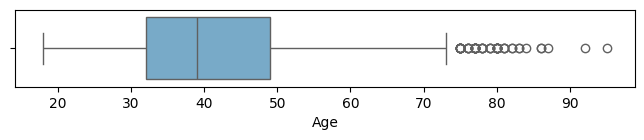

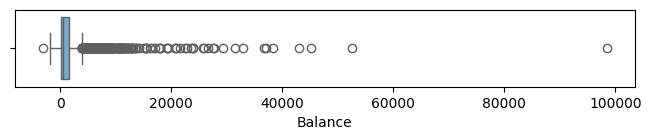

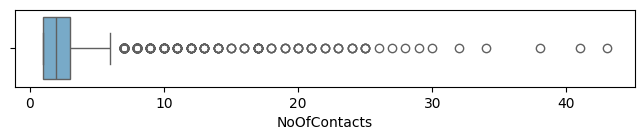

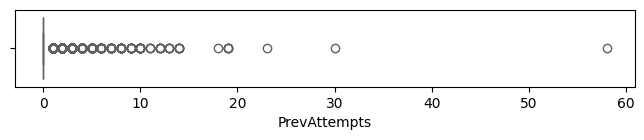

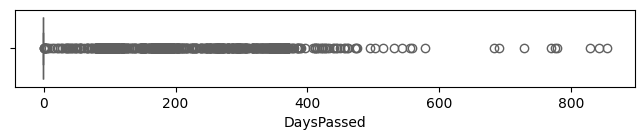

In [ ]:
for cat in ['Age','Balance','NoOfContacts','PrevAttempts','DaysPassed']:
    plt.figure(figsize=(8,1))
    sns.boxplot(data=df, x=cat,palette='Blues')


berdasarkan boxplot diatas, terlihat tardapat nilai ekstrem atau outlier pada variabel 'Age' dan 'Balance'. maka kita perlu menghandle outlier ini



In [ ]:
for cat in ['Age','Balance']:
    Q3, Q1 = np.percentile(df[cat], [75, 25])
    print('___________________________________________________')
    print(cat)
    print('___________________________________________________')
    print('Q1=',Q1)
    print('Q3=',Q3)
    IQR = Q3 - Q1
    print('IQR:',IQR)
    print('Interval:[', df[cat].mean() - 3*IQR,'&',df[cat].mean() + 3*IQR,']')
    print('min=',df[cat].min())
    print('max=',df[cat].max())

    n=((df[cat]>= (df[cat].mean() + 3*IQR)).sum())
    m=((df[cat]<= (df[cat].mean() - 3)).sum())
    print('pecentage of outliers(max):',n/df.shape[0])
    print('pecentage of outliers(min):',m/df.shape[0])

___________________________________________________
Age
___________________________________________________
Q1= 32.0
Q3= 49.0
IQR: 17.0
Interval:[ -9.785249999999998 & 92.21475000000001 ]
min= 18
max= 95
pecentage of outliers(max): 0.00025
pecentage of outliers(min): 0.48625
___________________________________________________
Balance
___________________________________________________
Q1= 111.0
Q3= 1619.0
IQR: 1508.0
Interval:[ -2991.06275 & 6056.93725 ]
min= -3058
max= 98417
pecentage of outliers(max): 0.05225
pecentage of outliers(min): 0.74075


* berdasarkan hasil diatas terlihat bahwa klien yang lebih tua dari 92 tahun dianggap sebagai outlier. maka klien yang umurnya lebih tua dari 92 tahun akan dihapus.
* data rata-rata saldo tahunan cenderung condong karena terdapat banyak nilai ekstrim. Oleh karena itu, kita akan menghapus nilai-nilai yang tidak termasuk dalam interval ini -2991 sampai 6056.


In [ ]:
df_rmout=df

df_rmout=df_rmout[(df_rmout.Age < 92)]
percentage_rm=(df.shape[0]-df_rmout.shape[0])/df.shape[0]
print('the percentage of removed data:',(percentage_rm*100))

df_rmout2=df_rmout
df_rmout2=df_rmout2[(df_rmout2.Balance <= 6056.93725)&(df_rmout2.Balance > -2991.06275)]
percentage_rm=(df.shape[0]-df_rmout2.shape[0])/df.shape[0]
print('the percentage of removed data:',(percentage_rm*100))


df_rmout=df_rmout[(df_rmout.Balance <df_rmout.Balance.max())&(df_rmout.Balance>df_rmout.Balance.min() )]
df_rmout.shape
trdf=df_rmout

the percentage of removed data: 0.05
the percentage of removed data: 5.3


setelah dilakukan handling outlier, maka data age terdapat 0,05% dihapus karena memiliki outlier. dan untuk data balance sebanyak 5,3%.


<ipython-input-28-778955e691d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rmout, x=cat,palette='Blues')
<ipython-input-28-778955e691d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rmout, x=cat,palette='Blues')


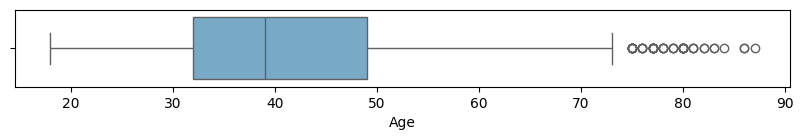

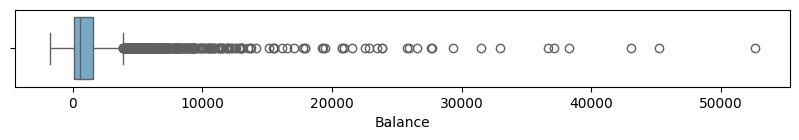

In [ ]:
for cat in ['Age','Balance']:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df_rmout, x=cat,palette='Blues')

dari plot diatas terlihat setelah dilakukan penghapusan missing value maka pada data 'Age' dan 'balance' tidak terdapat outlier lagi.

#### **Mengubah tipe data pada atribut CallStart dan CallEnd menjadi datetime**

In [ ]:
import datetime as dt
df['CallStart'] = pd.to_datetime(df['CallStart'])
df['CallEnd'] = pd.to_datetime(df['CallEnd'])
df.info()

<ipython-input-29-84dd48ab2e85>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CallStart'] = pd.to_datetime(df['CallStart'])
<ipython-input-29-84dd48ab2e85>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CallEnd'] = pd.to_datetime(df['CallEnd'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Age               4000 non-null   int64         
 1   Job               3981 non-null   object        
 2   Marital           4000 non-null   object        
 3   Education         3831 non-null   object        
 4   Default           4000 non-null   int64         
 5   Balance           4000 non-null   int64         
 6   HHInsurance       4000 non-null   int64         
 7   CarLoan           4000 non-null   int64         
 8   Communication     3098 non-null   object        
 9   LastContactDay    4000 non-null   int64         
 10  LastContactMonth  4000 non-null   object        
 11  NoOfContacts      4000 non-null   int64         
 12  DaysPassed        4000 non-null   int64         
 13  PrevAttempts      4000 non-null   int64         
 14  Outcome           958 no

Terlihat bahwa tipe data pada CallStart dan CallEnd telah berubah menjadi datetime

#### **Membuat kolom baru bernama "call_time"**

In [ ]:
df["call_time"] = df["CallEnd"]  - df["CallStart"]
df["call_time"] = df["call_time"].dt.components["minutes"]*60 + df["call_time"].dt.components["seconds"]
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,call_time
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,2024-05-02 13:45:20,2024-05-02 13:46:30,0,70
1,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2024-05-02 14:49:03,2024-05-02 14:52:08,0,185
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,2024-05-02 16:30:24,2024-05-02 16:36:04,1,340
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,2024-05-02 12:06:43,2024-05-02 12:20:22,1,819
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,2024-05-02 14:35:44,2024-05-02 14:38:56,0,192


pada data diatas terlihat bahwa kolom baru dengan nama 'call_time' telah ditambahkan. dimana kolom ini berfungsi unutk melihat selisih antara 'CallStart' dan 'CallEnd' sehingga dapat diketahui berapa lama panggilan berlangsung.


In [ ]:
print(df.call_time.describe())

count    4000.000000
mean      350.844000
std       342.236576
min         5.000000
25%       126.000000
50%       232.000000
75%       460.000000
max      3253.000000
Name: call_time, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Age               4000 non-null   int64         
 1   Job               3981 non-null   object        
 2   Marital           4000 non-null   object        
 3   Education         3831 non-null   object        
 4   Default           4000 non-null   int64         
 5   Balance           4000 non-null   int64         
 6   HHInsurance       4000 non-null   int64         
 7   CarLoan           4000 non-null   int64         
 8   Communication     3098 non-null   object        
 9   LastContactDay    4000 non-null   int64         
 10  LastContactMonth  4000 non-null   object        
 11  NoOfContacts      4000 non-null   int64         
 12  DaysPassed        4000 non-null   int64         
 13  PrevAttempts      4000 non-null   int64         
 14  Outcome           958 no

In [ ]:
df.drop(columns=['CallStart', 'CallEnd'], inplace=True)

#### **Missing Value**

In [ ]:
df.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CarInsurance           0
call_time              0
dtype: int64

terdapat missing value pada atribut job,education, communication, dan outcome

In [ ]:
null_cols = ["Job","Education", "Communication", "Outcome"]
for col in null_cols[:3]:
    df[col] = df[col].fillna(df[col].dropna().mode().values[0])

pada kode diatas nilai NaN dari 3 kolom pertama yaitu kolom job, education, dan communication diganti dengan nilai modus.

In [ ]:
df["Outcome"] = df["Outcome"].fillna("no prevoius contact")

berdasrkan kode diatas, jika ada baris dalam kolom "Outcome" yang memiliki nilai yang hilang (NaN), nilai tersebut akan diganti dengan string "no prevoius contact"

In [ ]:
df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CarInsurance        0
call_time           0
dtype: int64

terlihat bahwa pada dataframe tidak terdapat missing value lagi.

#### **Mengubah Variabel Categorical ke Numeric**

In [ ]:
df = pd.get_dummies(df, columns=['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome'])

### **3. PEMILIHAN MODEL**

pada projek kali ini, karena akan melakukan prediksi pembeli asuransi mobil yang mana hal tersebut masuk ke dalam survived learning maka untuk membangun model prediksi saya memilih model "Logistic Regression". hal ini karena model logistic regression relatif sederhana dan mudah dipahami. selain itu, logistic regression adalah pilihan yang baik karena secara alami menghasilkan output dalam bentuk probabilitas, yang dimana di sini saya akan memprediksi probabilitas bahwa seorang pelanggan akan membeli asuransi mobil berdasarkan riwayat pembelian sebelumnya, preferensi, dan faktor-faktor lainnya.


#### **Flowchart Alur**

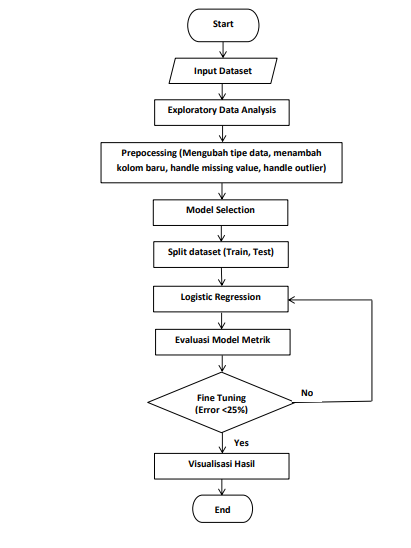

#### **Arsitektur Logistic Regression**

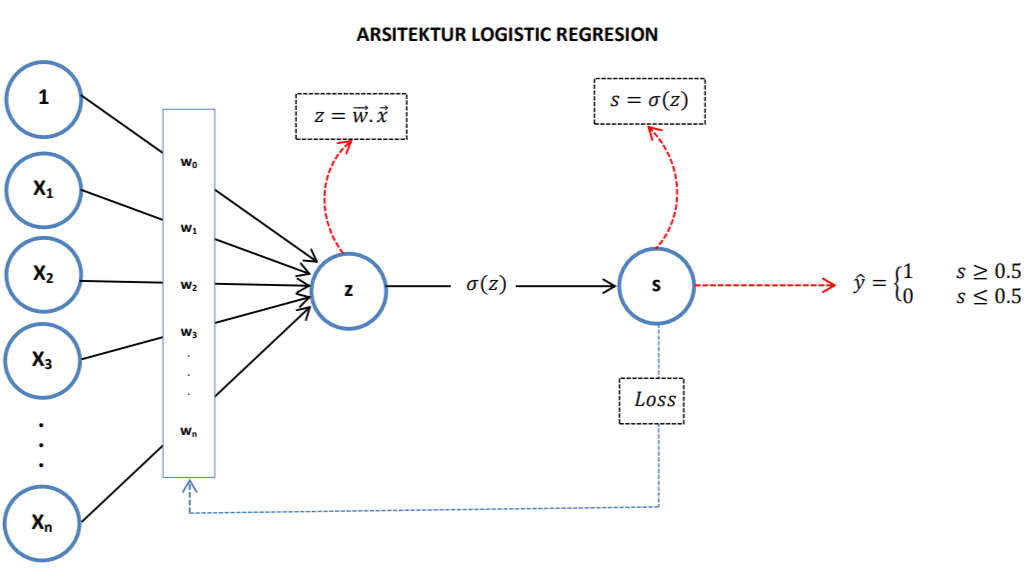

* x1,x2,x3...xn merujuk kepada variabel-variabel independen atau fitur-fitur yang digunakan untuk memprediksi variabel dependen atau target. Setiap xi mewakili satu fitur atau atribut yang dapat mempengaruhi hasil prediksi. dalam hal ini terdapat 16 variabel independen yang saya gunakan yaitu Age,Job, Marital, Education, Default, Balance, HHInsurance, CarLoan,Communication, LastContactDay, LastContactMonth, NoOfContact, DayPassed, PrevAttempts, Outcome, dan call_time.
Angka 1 pada arsitektur logistic regression merujuk pada intercept atau bias dalam model.
* w1 ,w2, w3​,…,wn merujuk pada bobot atau koefisien yang diterapkan pada setiap variabel independen. Bobot (wi) menunjukkan seberapa besar pengaruh setiap variabel independen terhadap prediksi. Semakin besar nilai absolut dari wi, semakin besar pengaruh variabel terhadap prediksi.
* nilai z adalah hasil dari operasi kombinasi linear dari fitur-fitur dan bobotnya. Nilai z dihitung dengan menjumlahkan hasil perkalian antara setiap nilai fitur dengan bobot yang sesuai, kemudian menambahkan nilai bias. nilai z memungkinkan kita untuk mengevaluasi seberapa besar pengaruh masing-masing fitur terhadap prediksi. Semakin besar nilai z, maka semakin besar kontribusi fitur terhadap kemungkinan terjadinya peristiwa yang diprediksi.
* s merujuk pada fungsi sigmoid pada logistic regression. Fungsi sigmoid (σ) adalah fungsi matematika yang mengambil input dalam bentuk bilangan riil dan menghasilkan output yang berada dalam rentang 0 hingga 1. dalam hal ini nilai z akan dikonversi menggunakan fungsi sigmoid menjadi probabilitas. Fungsi sigmoid ini memastikan bahwa output berada dalam rentang antara 0 dan 1.
* y merupakan output dari preediksi. dimana pada tahap ini jika y  0.5 maka akan diklasifikasikan ke kelas positif (1), dan jika y ≤0.5,mka akan diklasifikasikan ke kelas negatif (0).
* Fungsi loss, digunakan untuk mengukur seberapa baik model memprediksi probabilitas kelas target yang sesuai dengan label sebenarnya dari data training. fungsi loss ini berguna untuk mengoptimalkan model. proses ini dilakukan berulang-ulang hingga model mencapai jumlah iterasi yang ditentukan selesai. Semakin rendah nilai loss, maka akan semakin baik model dalam membuat prediksi


### **4. SPLIT DATASET (TRAIN & TEST)**

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data train (75%) dan data test (25%)
y = df['CarInsurance']
X = df.drop('CarInsurance', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

disini saya mengambil kolom 'CarInsurance' dari Dataset sebagai label atau target (y). kemudian mengambil seluruh kolom dari dataset kecuali kolom 'CarInsurance' sebagai fitur (X). Fitur-fitur ini akan digunakan untuk melakukan prediksi terhadap target. selanjutnya mengatur proporsi data train sebesar 75% dari total dataset, sehingga data test akan menjadi 25%.

### **5. MEMBANGUN MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# Inisialisasi model regresi logistik
lr_model = LogisticRegression(max_iter=10000)

#### **Model 1**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['liblinear'],
    'penalty': ['l2'],
    'C': [0.01]
}

# Membuat objek GridSearchCV
lr_grid_search1 = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search1.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search1.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model1 = lr_grid_search1.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model1.predict(X_train)
y_test_pred = best_lr_model1.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.805, Test: 0.795
MSE - Train: 0.195, Test: 0.205


### **6. OPTIMASI HYPERPAREMETER**


#### **Model 2**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['sag'],
    'penalty': ['l2'],
    'C': [0.1]
}

# Membuat objek GridSearchCV
lr_grid_search2 = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search2.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search2.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model2 = lr_grid_search2.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model2.predict(X_train)
y_test_pred = best_lr_model2.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.746, Test: 0.749
MSE - Train: 0.254, Test: 0.251


#### **Model 3**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['saga'],
    'penalty': ['l2'],
    'C': [1.0]
}

# Membuat objek GridSearchCV
lr_grid_search3 = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search3.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search3.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model3 = lr_grid_search3.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model3.predict(X_train)
y_test_pred = best_lr_model3.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.742, Test: 0.745
MSE - Train: 0.258, Test: 0.255


#### **Model 4**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['newton-cg'],
    'penalty': ['l2'],
    'C': [1.0]
}

# Membuat objek GridSearchCV
lr_grid_search4 = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search4.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search4.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model4 = lr_grid_search4.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model4.predict(X_train)
y_test_pred = best_lr_model4.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.817, Test: 0.812
MSE - Train: 0.183, Test: 0.188


#### **Model 5**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['newton-cholesky'],
    'penalty': ['l2'],
    'C': [10]
}

# Membuat objek GridSearchCV
lr_grid_search5 = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search5.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search5.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model5 = lr_grid_search5.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model5.predict(X_train)
y_test_pred = best_lr_model5.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cholesky'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.817, Test: 0.813
MSE - Train: 0.183, Test: 0.187


#### **Model 6**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['lbfgs'],
    'penalty': ['l2'],
    'C': [100]
}

# Membuat objek GridSearchCV
lr_grid_search6 = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search6.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search6.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model6 = lr_grid_search6.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model6.predict(X_train)
y_test_pred = best_lr_model6.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.819, Test: 0.813
MSE - Train: 0.181, Test: 0.187


hasil tersebut menunjukkan bahwa kombinasi hyperparameter terbaik yang ditemukan oleh GridSearchCV adalah
*   C= 1.0, penalty= 'l2', dan solver= 'newton-cg' dengan error pada data train sebesar 18,3%	dan data test 18,8%
*   C= 10, penalty= 'l2', dan solver= 'newton-cholesky' dengan error pada data train sebesar 18,3%	dan data test 18,7%
*  C= 100, penalty= 'l2', dan solver= 'lbfgs' dengan error pada data train sebesar 18,1%	dan data test 18,7%



### **7. FINE TUNING**

#### **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Inisialisasi model KNN
knn_model = KNeighborsRegressor()

# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 untuk manhattan_distance, 2 untuk euclidean_distance
}

# Membuat objek GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
knn_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(knn_grid_search.best_params_)

# Membuat model KNN dengan parameter terbaik
best_knn_model = knn_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Menghitung dan mencetak skor MSE untuk data train dan data test
print('Metrics for the best KNN model:')
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found by GridSearchCV:
{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Metrics for the best KNN model:
MSE - Train: 0.133, Test: 0.162


#### **Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Inisialisasi model Decision Tree Regression
dt_model = DecisionTreeRegressor()

# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'max_depth': [10,5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4,2]
}

# Membuat objek GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
dt_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(dt_grid_search.best_params_)

# Membuat model Decision Tree Regression dengan parameter terbaik
best_dt_model = dt_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

# Menghitung dan mencetak skor MSE untuk data train dan data test
print('Metrics for the best Decision Tree Regression model:')
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found by GridSearchCV:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Metrics for the best Decision Tree Regression model:
MSE - Train: 0.126, Test: 0.148


#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest Regression
rf_model = RandomForestRegressor()

# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
}

# Membuat objek GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
rf_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(rf_grid_search.best_params_)

# Membuat model Random Forest Regression dengan parameter terbaik
best_rf_model = rf_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Menghitung dan mencetak skor MSE untuk data train dan data test
print('Metrics for the best Random Forest Regression model:')
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found by GridSearchCV:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Metrics for the best Random Forest Regression model:
MSE - Train: 0.027, Test: 0.124


#### **XGBoost**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Inisialisasi model XGBoost Regression
xgb_model = XGBRegressor()

# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
}

# Membuat objek GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
xgb_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(xgb_grid_search.best_params_)

# Membuat model XGBoost Regression dengan parameter terbaik
best_xgb_model = xgb_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Menghitung dan mencetak skor MSE untuk data train dan data test
print('Metrics for the best XGBoost Regression model:')
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Metrics for the best XGBoost Regression model:
MSE - Train: 0.061, Test: 0.118


Berikut ini adalah hasil error dari masing-masing model:

Linear Regression (LR):
* Error pada data train: 18,3%
* Error pada data test: 18,8%

K-Nearest Neighbors (KNN) memiliki berikut hasil error:
* Error pada data train: 13,3%
* Error pada data test: 16,2%

Decision Tree (DT) memiliki berikut hasil error:
* Error pada data train: 12,6%
*Error pada data test: 14,8%

Random Forest (RF) memiliki berikut hasil error:
* Error pada data train: 2,7%
* Error pada data test: 12,3%

XGBoost memiliki berikut hasil error:
* Error pada data train: 6,1%
* Error pada data test: 11,8%

Dari hasil tersebut terlihat bahwa model Decission Tree memiliki performa yang paling bagus dalam melakukan regresi unutk memprediksi pembeli asuransi mobil daripada keempat model lainnya.

### **8. INTERPRETASI**

In [ ]:
# Mendapatkan koefisien (fitur importance) dari model terbaik
feature_importance = best_lr_model6.coef_[0]

# Mendapatkan nama fitur dari dataset
feature_names = X_train.columns

# Mengurutkan fitur importance dan nama fitur secara bersamaan
sorted_indices = feature_importance.argsort()
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Mencetak fitur importance yang diurutkan
print("Feature Importance:")
for name, importance in zip(sorted_feature_names, sorted_feature_importance):
    print(f"{name}: {importance}")


Feature Importance:
LastContactMonth_jan: -1.1024474484720599
Outcome_no prevoius contact: -0.9043321570581169
LastContactMonth_may: -0.864274066368922
CarLoan: -0.8244677695377729
HHInsurance: -0.8190673366113176
LastContactMonth_aug: -0.6899909782707991
Outcome_failure: -0.6350563263594308
Outcome_other: -0.6172214602423624
Job_entrepreneur: -0.5735365353353175
LastContactMonth_jul: -0.5220752626832387
LastContactMonth_nov: -0.5125706730930306
Job_self-employed: -0.45271994976856006
Job_blue-collar: -0.43730416450916854
LastContactMonth_jun: -0.3530945001428081
Marital_married: -0.22326286691322786
Education_secondary: -0.20630030802115565
Education_primary: -0.19641066098211918
Communication_cellular: -0.1715652134440851
Job_management: -0.1528495336415036
NoOfContacts: -0.11999451549578172
Default: -0.116569483464856
Job_housemaid: -0.10959348816140603
Job_technician: -0.057678180660462666
Marital_divorced: -0.0368974551189837
Communication_telephone: -0.015130622767410732
Job_serv

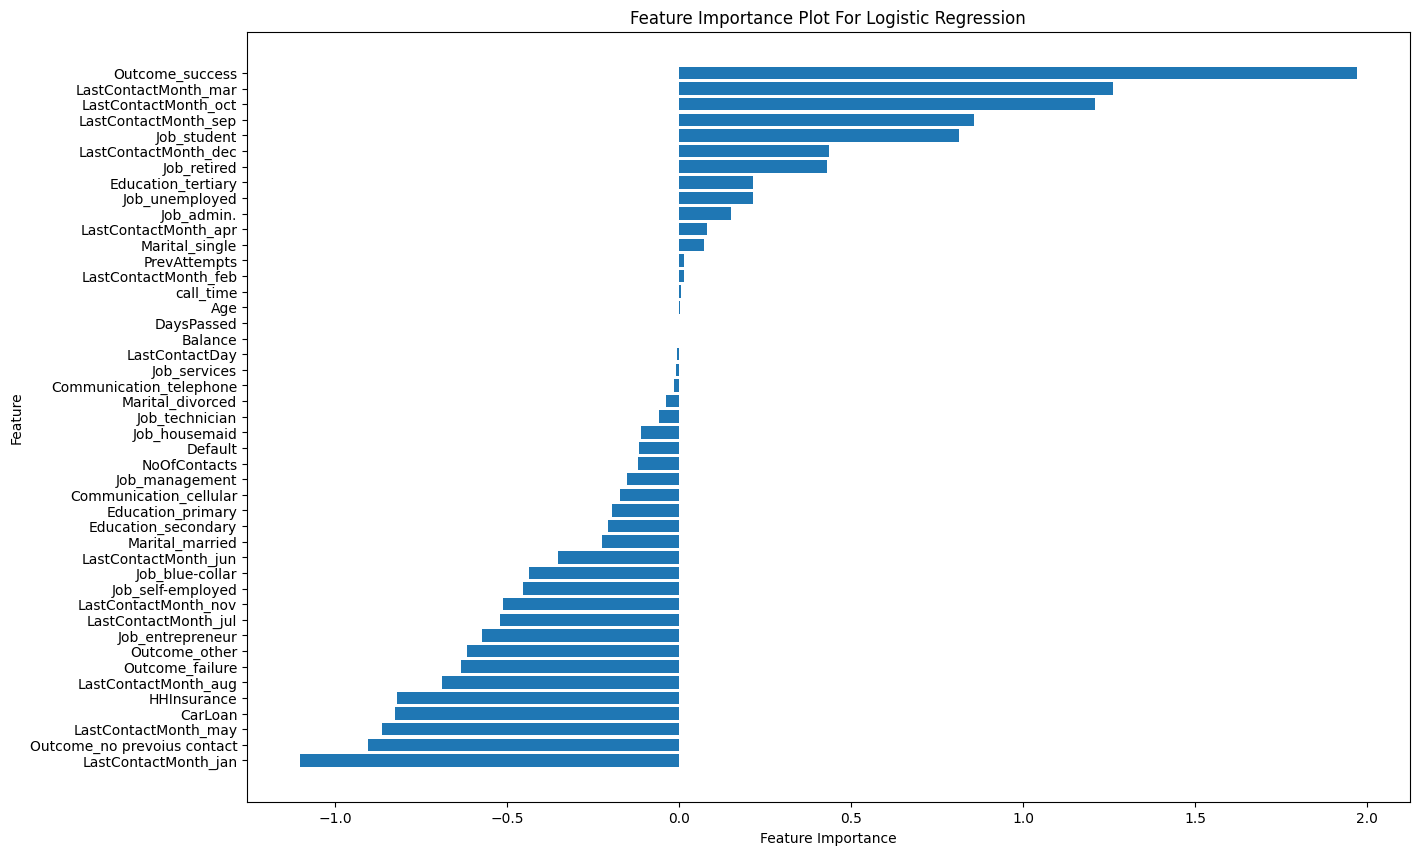

In [ ]:
import matplotlib.pyplot as plt

# Mendefinisikan ukuran plot
plt.figure(figsize=(15, 10))

# Membuat diagram barplot dari fitur importance
plt.barh(sorted_feature_names, sorted_feature_importance)

# Menambahkan judul dan label sumbu
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot For Logistic Regression')

# Menampilkan plot
plt.show()


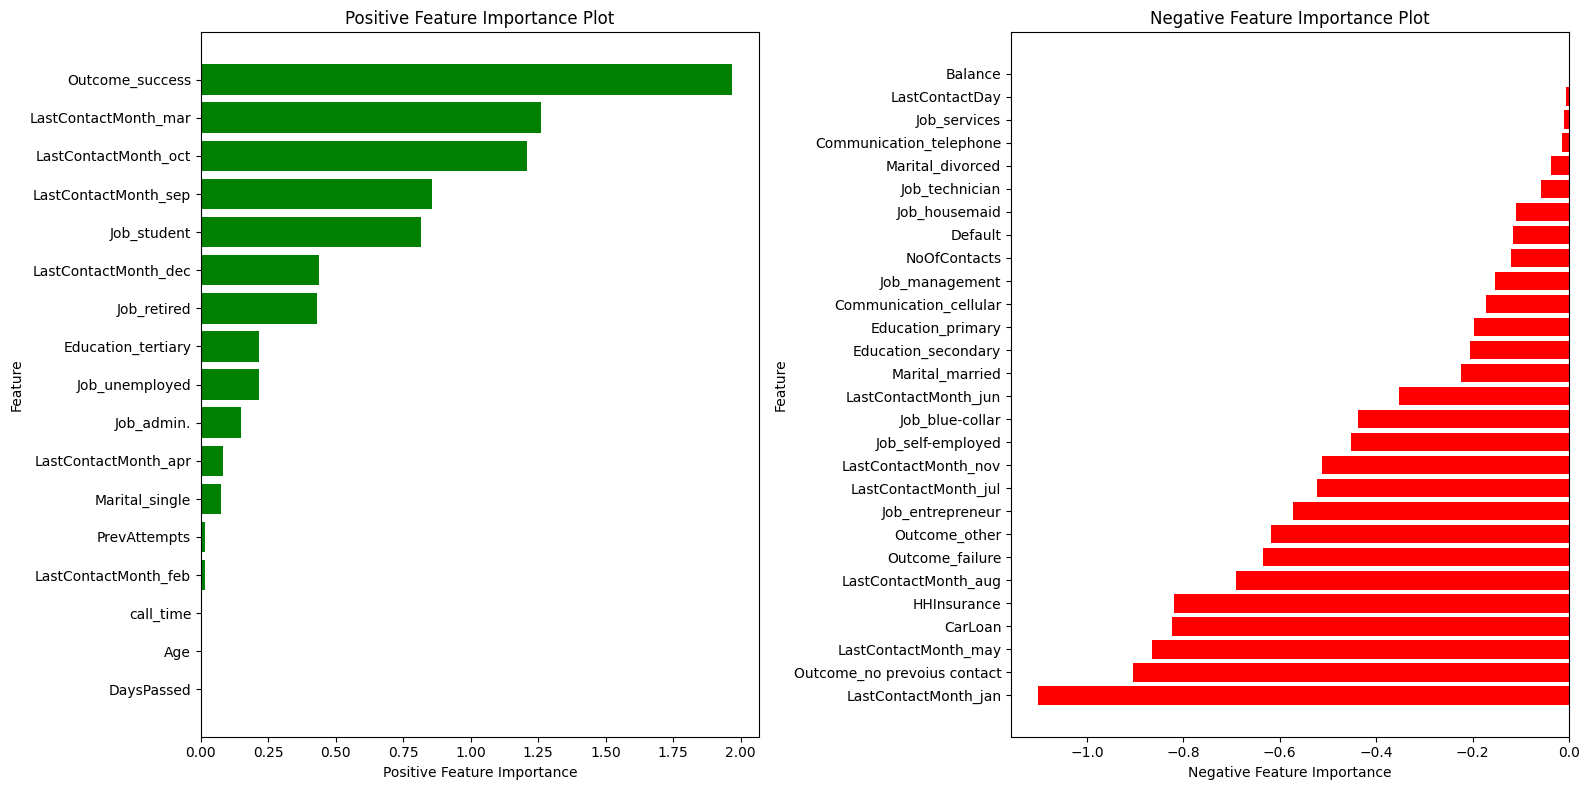

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mendefinisikan fitur importance positif dan negatif
positive_feature_importance = sorted_feature_importance[sorted_feature_importance > 0]
positive_feature_names = sorted_feature_names[sorted_feature_importance > 0]

negative_feature_importance = sorted_feature_importance[sorted_feature_importance < 0]
negative_feature_names = sorted_feature_names[sorted_feature_importance < 0]

# Mendefinisikan ukuran plot
plt.figure(figsize=(16, 8))

# Plot fitur importance positif
plt.subplot(1, 2, 1)
plt.barh(positive_feature_names, positive_feature_importance, color='green')
plt.xlabel('Positive Feature Importance')
plt.ylabel('Feature')
plt.title('Positive Feature Importance Plot')

# Plot fitur importance negatif
plt.subplot(1, 2, 2)
plt.barh(negative_feature_names, negative_feature_importance, color='red')
plt.xlabel('Negative Feature Importance')
plt.ylabel('Feature')
plt.title('Negative Feature Importance Plot')

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan plot diagram diatas dapat disimpulkan bahwa :

1. Fitur yang Mempengaruhi Prediksi Positif:
 - 'Outcome_success': Pelanggan yang telah berhasil dalam interaksi sebelumnya cenderung lebih mungkin untuk melakukan pembelian. Jika pelanggan memiliki pengalaman positif atau memiliki minat sebelumnya dalam asuransi mobil, mereka mungkin lebih cenderung untuk membeli asuransi setelah kontak yang berhasil.
   - 'LastContactMonth_mar' dan 'LastContactMonth_oct': Kontak yang dilakukan pada bulan Maret dan oktober mungkin memiliki dampak positif yang besar pada keputusan pembelian pelanggan. Bulan-bulan ini mungkin memiliki karakteristik khusus, seperti musim liburan atau promosi khusus, yang meningkatkan kemungkinan pelanggan untuk membeli asuransi mobil.
  

2. Fitur yang Mempengaruhi Prediksi Negatif:
   - 'LastContactMonth_jan' dan 'LastContactMonth_may': Kontak yang dilakukan pada bulan Januari cenderung kurang berhasil dalam mendorong pelanggan untuk melakukan pembelian. Ini mungkin karena bulan-bulan tersebut mungkin terkait dengan periode waktu di mana pelanggan cenderung sibuk atau kurang berminat dalam pembelian asuransi mobil. Misalnya, bulan Januari mungkin setelah musim liburan di mana pelanggan fokus pada pengeluaran lain. Bulan Mei mungkin terkait dengan musim panas atau liburan sekolah di mana perhatian pelanggan teralihkan dari pembelian asuransi mobil.
   - 'Outcome_no previous contact': Pelanggan yang tidak pernah dihubungi sebelumnya cenderung memiliki kecenderungan yang lebih rendah untuk melakukan pembelian. ketika tidak ada kontak sebelumnya, pelanggan mungkin belum memiliki kesadaran atau minat dalam asuransi mobil, yang dapat mengurangi kemungkinan mereka untuk membeli.

### **9. VISUALISASI HASIL**

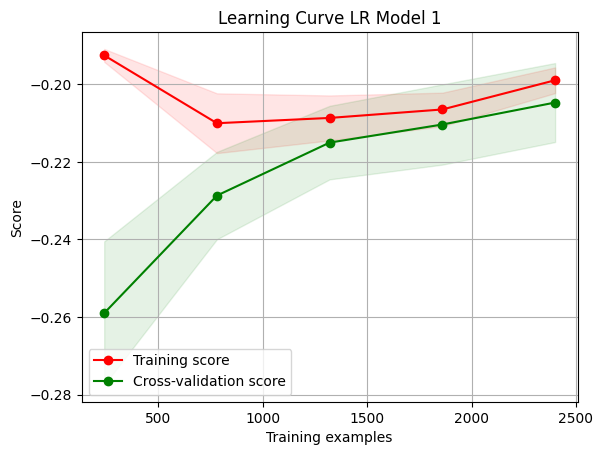

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definisikan fungsi untuk plotting learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Tentukan model yang akan digunakan
estimator = lr_grid_search1.best_estimator_
title = "Learning Curve LR Model 1"

# Plot learning curve
plot_learning_curve(estimator, title, X_train, y_train, cv=5)
plt.show()


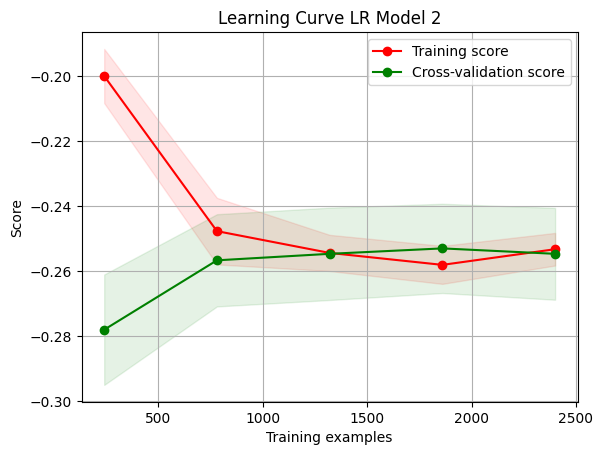

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definisikan fungsi untuk plotting learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Tentukan model yang akan digunakan
estimator = lr_grid_search2.best_estimator_
title = "Learning Curve LR Model 2"

# Plot learning curve
plot_learning_curve(estimator, title, X_train, y_train, cv=5)
plt.show()


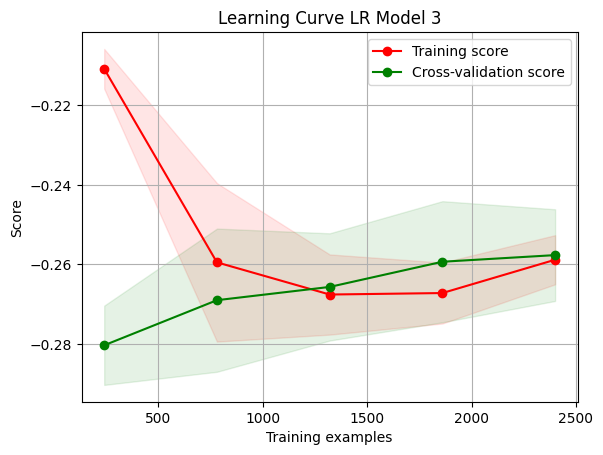

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definisikan fungsi untuk plotting learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Tentukan model yang akan digunakan
estimator = lr_grid_search3.best_estimator_
title = "Learning Curve LR Model 3"

# Plot learning curve
plot_learning_curve(estimator, title, X_train, y_train, cv=5)
plt.show()


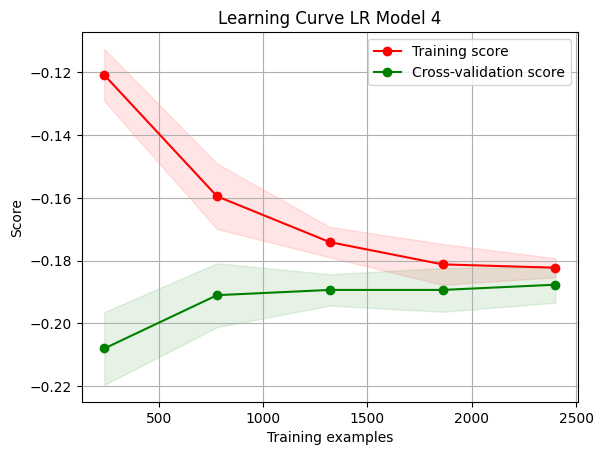

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definisikan fungsi untuk plotting learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Tentukan model yang akan digunakan
estimator = lr_grid_search4.best_estimator_
title = "Learning Curve LR Model 4"

# Plot learning curve
plot_learning_curve(estimator, title, X_train, y_train, cv=5)
plt.show()


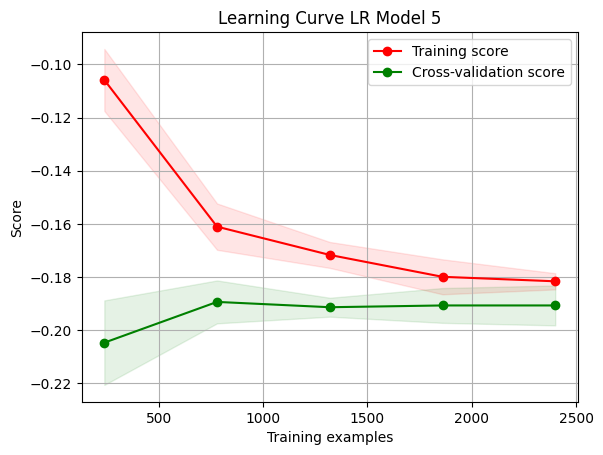

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definisikan fungsi untuk plotting learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Tentukan model yang akan digunakan
estimator = lr_grid_search5.best_estimator_
title = "Learning Curve LR Model 5"

# Plot learning curve
plot_learning_curve(estimator, title, X_train, y_train, cv=5)
plt.show()


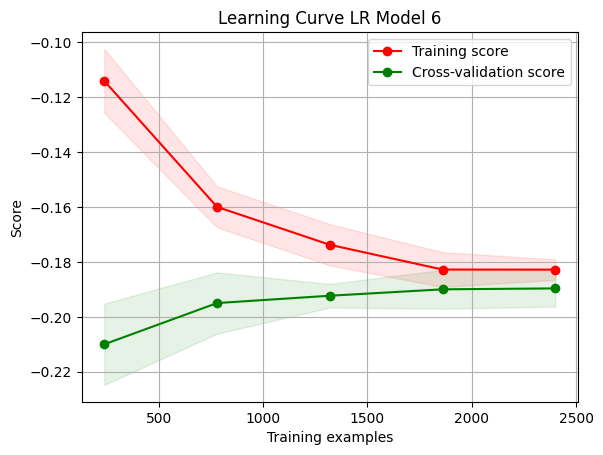

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definisikan fungsi untuk plotting learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Tentukan model yang akan digunakan
estimator = lr_grid_search6.best_estimator_
title = "Learning Curve LR Model 6"

# Plot learning curve
plot_learning_curve(estimator, title, X_train, y_train, cv=5)
plt.show()

* pada model 2 dan model 3 kemungkinan terjadi overfitting
* model terbaik adalah model 6 hal ini karena penurunan error model seiring dengan peningkatan jumlah data train cenderung stabil dari model lainnya sehingga menunjukkan bahwa model tersebut mampu belajar dari data dengan efektif.

Minimum Balance for Customers who Bought CarInsurance: 32
Minimum Age for Customers who Bought CarInsurance: 19
Minimum Call Time for Customers who Bought CarInsurance: 22


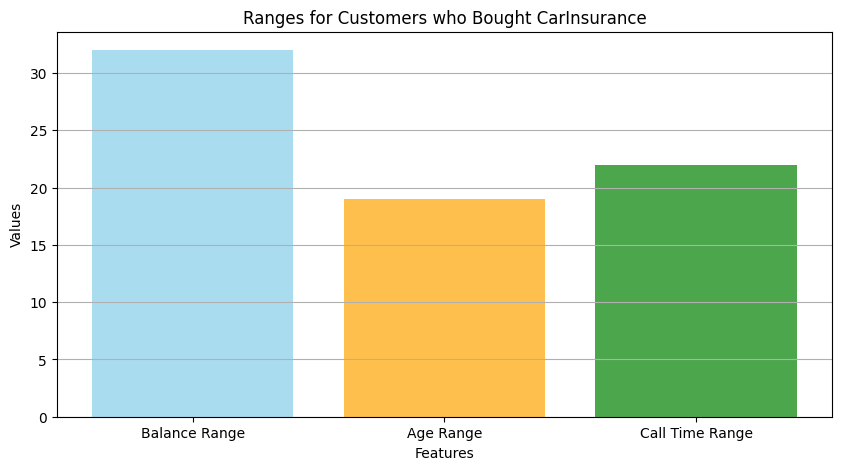

In [ ]:
# Filter data pelanggan yang membeli CarInsurance
car_insurance_buyers = X_test[y_pred == 1]

# Filter data pelanggan yang membeli CarInsurance dan memiliki balance, usia, dan waktu panggilan positif
car_insurance_buyers_pos = car_insurance_buyers[(car_insurance_buyers['Balance'] > 30) & (car_insurance_buyers['Age'] > 0) & (car_insurance_buyers['call_time'] > 0)]


# Hitung nilai minimum dari masing-masing fitur
balance_range = car_insurance_buyers_pos['Balance'].min()
age_range = car_insurance_buyers_pos['Age'].min()
call_time_range = car_insurance_buyers_pos['call_time'].min()

# Print nilai minimum dari rentang balance, usia, dan waktu panggilan
print("Minimum Balance for Customers who Bought CarInsurance:", balance_range)
print("Minimum Age for Customers who Bought CarInsurance:", age_range)
print("Minimum Call Time for Customers who Bought CarInsurance:", call_time_range)

# Buat diagram
plt.figure(figsize=(10, 5))
# Balance
plt.bar('Balance Range', balance_range, color='skyblue', alpha=0.7)
# Age
plt.bar('Age Range', age_range, color='orange', alpha=0.7)
# Call Time
plt.bar('Call Time Range', call_time_range, color='green', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Ranges for Customers who Bought CarInsurance')
plt.grid(axis='y')
plt.show()


berdasarkan hasil feature importance sebelumnya, diambillah 3 buah variabel numerik yang memiliki pengaruh terhadap prediksi yaitu Balance, Age, dan call_time sehingga di dapat hasil sebagai berikut :
* Customer dengan usia di atas 19 tahun cenderung membeli asuransi mobil.
* Customer dengan saldo rekening diatas 32 USD cenderung membeli asuransi mobil.
* Lama durasi panggilan dengan customer yang berdurasi diatas 22 detik cenderung membeli asuransi mobil.